In [178]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer

import numpy as np

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.losses import BinaryCrossentropy
from keras.utils import to_categorical

In [179]:
# importing crop data of year 2020
crop_data = pd.read_csv('../data/ndvi/crop_data_ndvi_march_bbox00004.csv')

In [180]:
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude', 'ndvi_mean', 'ndvi_max'])
y = crop_data['Class of Land']

del crop_data

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=40)

In [182]:
X_train.shape

(360, 4)

In [183]:
y_train = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_train])
y_test = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_test])

In [184]:
model = Sequential()
model.add(Dense(32, input_shape=(4,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [185]:
model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [186]:
history = model.fit(X_train, y_train, epochs=100, batch_size=24, verbose=1, validation_data=(X_test, y_test), use_multiprocessing=True)

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 44.9652 - accuracy: 0.5167 - val_loss: 58.4853 - val_accuracy: 0.4708
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 33.3862 - accuracy: 0.5222 - val_loss: 30.5445 - val_accuracy: 0.4708
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 13.7260 - accuracy: 0.5194 - val_loss: 9.6976 - val_accuracy: 0.4708
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 2.6154 - accuracy: 0.5222 - val_loss: 0.6391 - val_accuracy: 0.4875
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.5417 - val_loss: 0.6294 - val_accuracy: 0.5167
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.5667 - val_loss: 0.6193 - val_accuracy: 0.5792
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6417 - val_loss: 0.6081 - val_accuracy: 0.6375
Epoch 8/

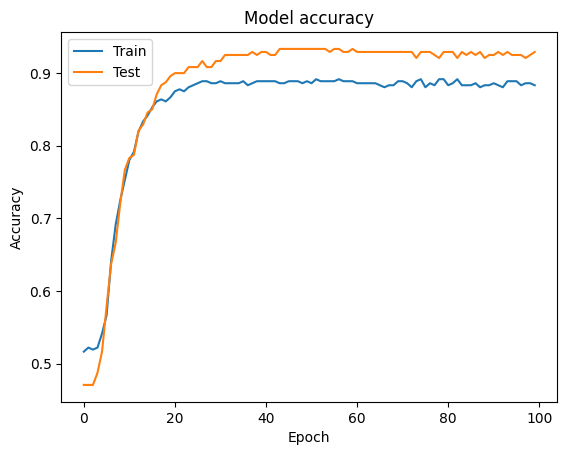

In [187]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

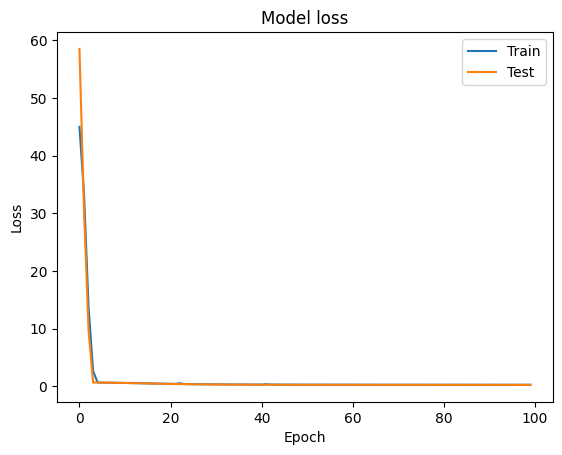

In [188]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [189]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

8/8 [==============================] - 0s 417us/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       113
           1       0.97      0.89      0.93       127

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



In [192]:
X_val = pd.read_csv('../data/ndvi/validation_data_ndvi_march_bbox00004.csv')
coords = X_val['Latitude and Longitude']
# X_val.drop(columns=['Latitude and Longitude', 'ndvi_mean', 'ndvi_max'], inplace=True)
X_val.drop(columns=['Latitude and Longitude', 'ndvi_max', 'ndvi_mean'], inplace=True)

In [193]:
y_pred = np.argmax(model.predict(X_val), axis=1)

8/8 [==============================] - 0s 401us/step


In [198]:
y_pred = pd.DataFrame(y_pred, columns=['target']).replace(1, 'Rice').replace(0, 'Non Rice')

y_pred.head()

,target
0,Rice
1,Rice
2,Non Rice
3,Non Rice
4,Rice


In [205]:
y_pred.where(y_pred == 'Rice').count(), y_pred.where(y_pred == 'Non Rice').count()

(target    81
 dtype: int64,
 target    169
 dtype: int64)